# Introducción a la Ciencia de Datos con Python

Para cumplir las necesidades de analizar datos utilizando el lenguaje de programación Python hay que utilizar funciones que están fuera de las base contenidas en Python, al contrario de por ejemplo R, en donde la mayoría de las funciones que utilizaremos a lo largo del curso están dentro de las funciones base.

Las bibliotecas de facto utilizadas en data science son `numpy`, `matplotlib`, `scipy` y `pandas`, las cuales nos aportaran con funciones desde programación vectorial hasta visualización de datos.

In [39]:
import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import plotly.express as px # Visualización
import scipy.optimize # Programación científica
import scipy.stats
import pandas as pd # Estructura y manipulación de datos

Los arreglos son zonas de almacenamiento contiguo que contienen una serie de elementos del mismo tipo, para utilizar esta estructura de datos utilizamos `numpy.array`.

Con `numpy.array` podemos obtener las ventajas de velocidad que nos ofrece la programación vectorial de `numpy`, al aplicar funciones directamente a un arreglo sin recurrir a un ciclo.

In [2]:
a = np.array([0,1,2]) # Inicializamos un numpy.array desde una lista de python
a

array([0, 1, 2])

Con la función `np.arange()` podemos crear un arreglo similar a la función `range()` de python en donde podemos especificar el largo del arreglo a generar y se devolverá un rango desde el 0 con el número de elementos especificado. 

In [3]:
x = np.arange(10) # Creamos un arreglo de un rángo de 10 números
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
a = x * 2 # Directamente podemos multiplicar cada uno de los valores del arreglo
a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

Generaremos datos al azar y para que nuestros resultados sean consistentes podemos bloquear el generador de números aleatorios con la función `np.random.seed(< number >)`

In [5]:
np.random.seed(11) # Bloqueamos la generación de números aleatorios con la semilla 11

Otra función que podemos utilizar para generar un arreglo es utilizar `np.random.normal(loc,scale,size)` para crear un arreglo al azar con distribución normal de largo `size`, con media `loc` y desviación estándar `scale`

In [6]:
e = np.random.normal(0 , 1, 10) # Arreglo de largo 10, media 0 y desviación estándar 1
e

array([ 1.74945474, -0.286073  , -0.48456513, -2.65331856, -0.00828463,
       -0.31963136, -0.53662936,  0.31540267,  0.42105072, -1.06560298])

In [7]:
y = a + e # Directamente podemos multiplicar cada uno de los valores del arreglo
y

array([ 1.74945474,  1.713927  ,  3.51543487,  3.34668144,  7.99171537,
        9.68036864, 11.46337064, 14.31540267, 16.42105072, 16.93439702])

No tan sólo podemos operar con arreglos unidimensionales, sino que también podemos operar sobre arreglos multidimensionales. Una de las funciones para generar un arreglo bidimensional es unir 2 arreglos como columnas, para realizar esto podemos utilizar la función `np.stack()` y concatenarlos por el eje 1.

Una descripción gráfica de los ejes en numpy se describe en la siguiente imagen.

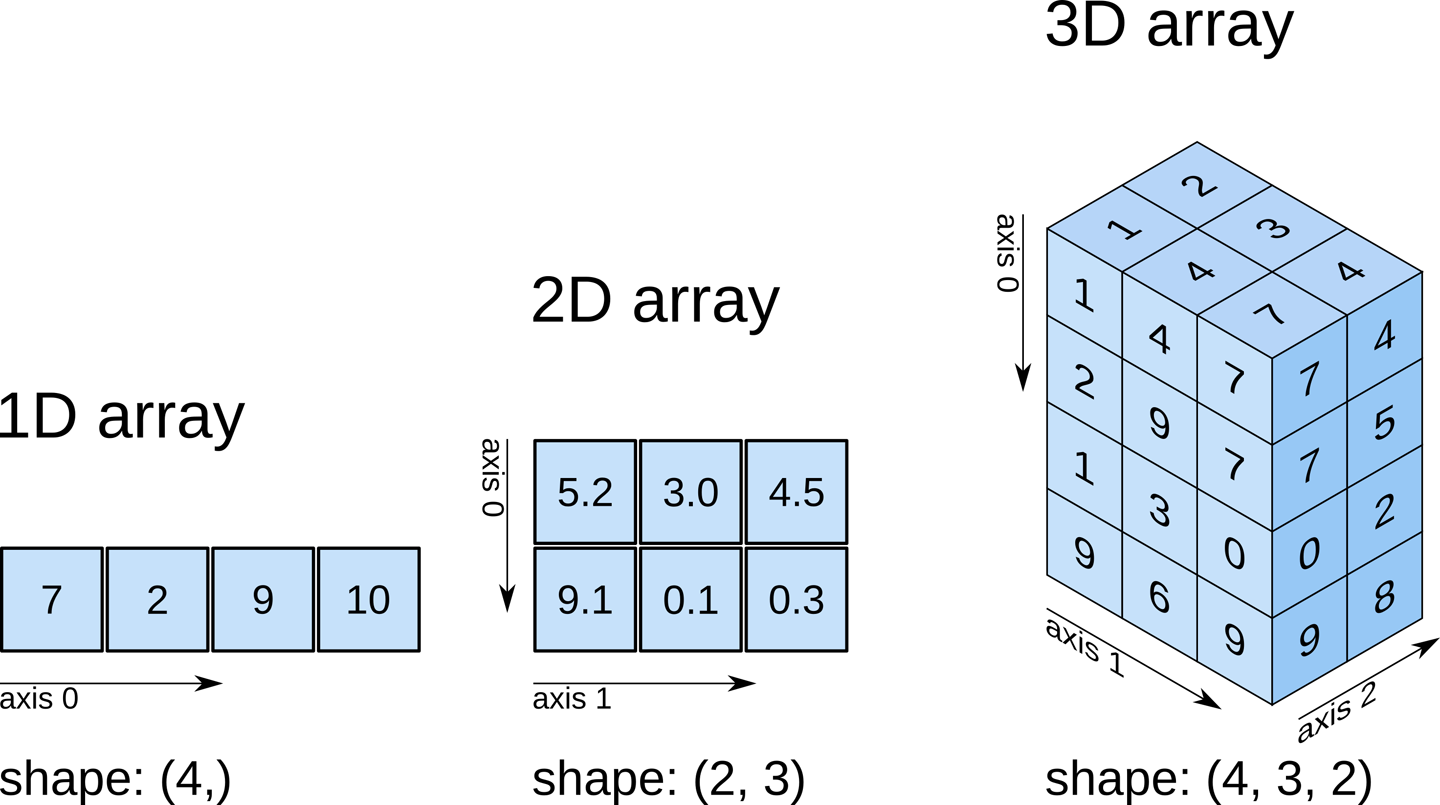

In [8]:
data = np.stack((x,y), axis=1) # Concatenamos los arreglos x e y por el eje 1 para generar el arreglo bidimensional data.
data

array([[ 0.        ,  1.74945474],
       [ 1.        ,  1.713927  ],
       [ 2.        ,  3.51543487],
       [ 3.        ,  3.34668144],
       [ 4.        ,  7.99171537],
       [ 5.        ,  9.68036864],
       [ 6.        , 11.46337064],
       [ 7.        , 14.31540267],
       [ 8.        , 16.42105072],
       [ 9.        , 16.93439702]])

Si queremos extraer un dato o un arreglo de datos específicos utilizamos la siguiente sintáxis `np.array[ < row >,< column > ]`

In [9]:
data[:,0] # Extraemos todas las filas, pero sólo la columna 0

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [10]:
data[0,:] # Extraemos todas las columnas, pero sólo la fila 0

array([0.        , 1.74945474])

In [11]:
data[0,0] # Extraemos el dato de la columna 0 y fila 0

0.0

Otra de las bibliotecas más utilizadas en ciencia de datos es matplotlib, con la cual podemos generar visualizaciones de los datos.

Con la función `plt.scatter()` podemos crear un gráfico de dispersión

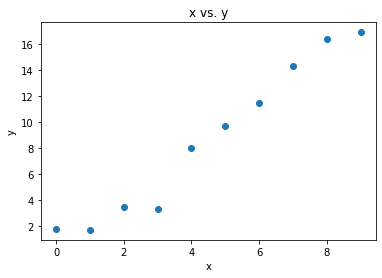

In [12]:
plt.scatter(data[:,0],data[:,1]) # Graficaremos la columna 0 sobre la columna 1 en un gráfico de dispersión
plt.title("x vs. y") # Título del gráfico
plt.xlabel("x") # Etiqueta del eje x
plt.ylabel("y") # Etiqueta del eje y
plt.show() # Imprimimos el gráfico

In [13]:
def linear_function(x,m,c):
    """ 
    Función que recibe los parámetros de una función lineal y retorna el resultado de la función lineal f(x) = mx + c.
    x: Variable real.
    m: Constante que determina la pendiente de la linea.
    c: Constante que determina el intercepto de la linea.
    """
    return m * x + c

Scipy es una biblioteca que contiene una serie de funciones de computación científica listas para aplicar.

Para poder ajustar la función `linear_function()` a nuestros datos, utilizaremos la función `scipy.optimize.curve_fit()`, la cual recibe la función a ajustar y los datos a la cual la ajustaremos.

In [14]:
model = scipy.optimize.curve_fit(linear_function, # Función a ajustar
                                 data[:,0],data[:,1] # Datos a los cuales ajustaremos la curva
                                )
model

(array([ 1.93729034, -0.00462623]), array([[ 0.01677671, -0.07549541],
        [-0.07549541,  0.47814061]]))

La función nos retorna una tupla de 2 objetos `np.array`, el primer arreglo son las constantes ajustadas de nuestra función lineal.

In [15]:
m = model[0][0] # Pendiente ajustada
c = model[0][1] # Intercepto ajustado

Para aprovechar las ventajas de la programación vectorial, debemos transformar nuestra función de Python `linear_function()` en una función vectorial, para que podamos aplicarla directamente sobre nuestro arreglo. Para esto utilizamos la función `np.vectorize()`.

In [16]:
linear_function_vectorized = np.vectorize(linear_function) # Transformamos nuestra función en una vectorial

In [17]:
y_hat = linear_function_vectorized(x,m,c) # Aplicamos nuestra función vectorizada sobre el arreglo x, junto a nuestras constantes m y c
y_hat

array([-4.62622679e-03,  1.93266411e+00,  3.86995446e+00,  5.80724480e+00,
        7.74453514e+00,  9.68182548e+00,  1.16191158e+01,  1.35564062e+01,
        1.54936965e+01,  1.74309868e+01])

Visualmente evaluemos el ajuste de nuestro modelo a los datos.

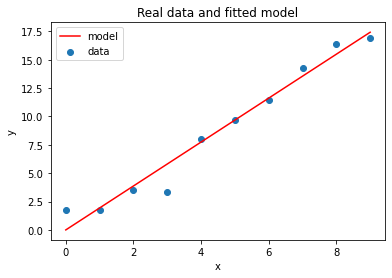

In [18]:
plt.scatter(data[:,0],data[:,1], label="data") # Graficamos nuestros datos con la etiqueta data
plt.plot(y_hat, color="red", label="model") # Graficamos los resultados de nuestro modelo ajustado
plt.title("Real data and fitted model")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Calculemos las pérdidas de nuestro modelo al compararlo a nuestros datos reales.

In [19]:
loss = y - y_hat
loss

array([ 1.75408097e+00, -2.18737112e-01, -3.54519589e-01, -2.46056336e+00,
        2.47180231e-01, -1.45684473e-03, -1.55745185e-01,  7.58996504e-01,
        9.27354211e-01, -4.96589828e-01])

In [20]:
abs_loss = np.abs(loss) # Calculamos el valor absoluto de las pérdidas
abs_loss

array([1.75408097e+00, 2.18737112e-01, 3.54519589e-01, 2.46056336e+00,
       2.47180231e-01, 1.45684473e-03, 1.55745185e-01, 7.58996504e-01,
       9.27354211e-01, 4.96589828e-01])

In [21]:
mae = abs_loss.mean() # Calculamos el error absoluto medio de nuestro modelo
mae

0.7375223828644797

Quizá la biblioteca más utilizada en ciencia de datos es `pandas`, la cual nos permite manejar datos de una manera muy simple gracias a su potente estructura de datos `pd.DataFrame`.

In [22]:
titanic = pd.read_csv("data/titanic.csv") # Importamos un CSV y Pandas nos retorna un pd.DataFrame
titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


Para explorar rapidamente un conjunto de datos, `pandas` nos ofrece unas métodos muy útiles.

In [23]:
titanic.head() # Con el método pd.DataFrame.head() podemos explorar las primeras filas de un pd.DataFrame

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [24]:
titanic.tail() # Con el método pd.DataFrame.tail() podemos explorar las últimas filas de un pd.DataFrame

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


In [25]:
titanic.sample() # Con el método pd.DataFrame.tail() podemos explorar una fila al azar de un pd.DataFrame

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
874,0,3,Mr. Kristo Laleff,male,23.0,0,0,7.8958


Al igual que en Numpy, en Pandas también podemos acceder a columnas específicas de nuestro conjunto de datos, pero en el caso de Pandas, podemos acceder facilmente mediante el nombre de la columna

In [26]:
titanic.Name # Extraemos la columna Name  Pandas retorna un pd.Series

0                                 Mr. Owen Harris Braund
1      Mrs. John Bradley (Florence Briggs Thayer) Cum...
2                                  Miss. Laina Heikkinen
3            Mrs. Jacques Heath (Lily May Peel) Futrelle
4                                Mr. William Henry Allen
                             ...                        
882                                 Rev. Juozas Montvila
883                          Miss. Margaret Edith Graham
884                       Miss. Catherine Helen Johnston
885                                 Mr. Karl Howell Behr
886                                   Mr. Patrick Dooley
Name: Name, Length: 887, dtype: object

In [27]:
titanic["Age"] # Otra sintaxis para extraer una columna

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
882    27.0
883    19.0
884     7.0
885    26.0
886    32.0
Name: Age, Length: 887, dtype: float64

In [28]:
titanic[["Sex","Pclass"]] # Podemos también extraer una lista de columnas

,Sex,Pclass
0,male,3
1,female,1
2,female,3
3,female,1
4,male,3
...,...,...
882,male,2
883,female,1
884,female,3
885,male,1


Para continuar con la exploración de nuetros datos, el método `pd.Series.describe()` nos devuelve una serie de descriptores de la columna.

In [29]:
titanic.Age.describe()

count    887.000000
mean      29.471443
std       14.121908
min        0.420000
25%       20.250000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [30]:
titanic.Sex.describe()

count      887
unique       2
top       male
freq       573
Name: Sex, dtype: object

El método `pd.Series.value_counts()` nos permite conocer la distribución de una columna de valores discretos.

In [31]:
titanic.Sex.value_counts()

male      573
female    314
Name: Sex, dtype: int64

Para poder filtrar un `pd.DataFrame` podemos entregar una expresión que nos retorne un arreglo de valores booleanos.

In [32]:
titanic[(titanic.Age < 5) & (titanic.Survived == 0)] # Filtramos sólo las personas menores a 5 años que no sobrevivieron

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
16,0,3,Master. Eugene Rice,male,2.0,4,1,29.1250
62,0,3,Master. Harald Skoog,male,4.0,3,2,27.9000
118,0,3,Miss. Ellis Anna Maria Andersson,female,2.0,4,2,31.2750
163,0,3,Master. Eino Viljami Panula,male,1.0,4,1,39.6875
170,0,3,Master. Arthur Rice,male,4.0,4,1,29.1250
204,0,3,Miss. Telma Matilda Strom,female,2.0,0,1,10.4625
295,0,1,Miss. Helen Loraine Allison,female,2.0,1,2,151.5500
372,0,3,Miss. Stina Viola Palsson,female,3.0,3,1,21.0750
384,0,3,Master. Sidney Leonard Goodwin,male,1.0,5,2,46.9000


In [33]:
titanic[titanic.Name.str.contains("Rose")] # Con el método pd.Series.str.contains() podemos filtrar una columna de texto

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
851,1,3,Mrs. Sam (Leah Rosen) Aks,female,18.0,0,1,9.35


Con el método `pd.DataFrame.groupby()` podemos agrupar los datos por los valores de una columna específica. Y con el método `pd.core.groupby.DataFrameGroupBy.agg()` podemos agregar los datos de cada grupo con un método específico.

In [34]:
grouped_titanic = titanic[["Pclass","Fare"]].groupby(by = "Pclass") # Agrupamos los datos por la clase del pasajero
grouped_titanic.agg("mean") # Agregamos los datos utilizando el promedio

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.707707


In [35]:
values_per_Pclass = {col_name:col for col_name, col in grouped_titanic["Fare"]} # Creamos un diccionario con los datos agrupados.

El módulo `stats` de `scipy` contiene una serie de funciones estadísticas.

Verificaremos si hay diferencias estadísticamente significativas entre las medias de las tarifas de los pasajeros de las distintas clases.

In [36]:
scipy.stats.f_oneway(*values_per_Pclass.values()) # Prueba ANOVA sobre la tarifa agrupada por clase del pasajero

F_onewayResult(statistic=240.66041792910025, pvalue=3.6153954125446083e-84)

Para verificar si hay diferencias estadísticamente significativas en la proporción de sobrevivientes por clase. Lo primero que se debe hacer es construir una tabla de contingencia utilizando la función `pd.crosstab()`

In [37]:
contingency_table = pd.crosstab(titanic.Pclass,titanic.Survived) # Tabla de contingencia de la clase vs la sobrevivencia del pasajero
contingency_table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,368,119


In [38]:
scipy.stats.chi2_contingency(contingency_table) # Aplicamos la prueba estadística chi cuadrado sobre la tabla de contingencia

(101.21674250560609,
 1.0496962042983216e-22,
 2,
 array([[132.71702368,  83.28297632],
        [113.05524239,  70.94475761],
        [299.22773393, 187.77226607]]))

El segundo elemento del resultado anterior el el `p_value`

Otra biblioteca muy utilizada para visualizar conjuntos de datos es Plotly, con su módulo ``plotly.express``. Un ejemplo de visualización con esta biblioteca es el histograma (``plotly.express.histogram``), en donde visualizamos la distribución de la edad del pasajero respecto a su sobrevivencia.

In [55]:
titanic["Survived"] = titanic["Survived"].astype(str)
px.histogram(
    titanic, 
    x="Age", 
    color="Survived"
)